# **Descrição do problema, contexto geopolítico e modelos usados**

Nesta seção buscamos prever o regime de mercado de um subconjunto das ETF's disponíveis. Por conveniência do momento, o conjunto escolhido foi o dos BRICS. 

Os regimes de mercado formam um tipo de classificação multiclasse em torno de 3 regimes principais: 

# 1. Bull
 *regime otimista onde as ações sobem*

# 2. Bear
*regime pessimista onde as ações descem*

# 3. Regime Neutro 
 *regime onde os preços ficam num intervalo bem definido*



# Contudo, há um contexto geopolítico em nossa avaliação que deve ser levado em conta:

 O Irã não tem dados no dataset trabalhado aqui (mesmo fazendo parte do BRICS);

 Rússia não pode ser trabalhada na mesma janela de tempo que os outros países aqui trabalhados (África do Sul, Brasil, China, India)
devido sua invasão à Ucrânia e consequente expulsão do sistema SWIFT -- o que impossibilitou a obtenção de dados econômicos da Rússia que não seja a partir de intermediários pagos.


Tendo o problema sido definido, usamos 6 modelos (Catboost, MLP, SVC, Random Forest, Regressão Logística, XGboost) num contexto onde cada um deles fora treinado individualmente para fornecer um voto final numa assembleia de modelos -- de modo que assim possamos decidir o regime final. 



Carregando o Dataset com dados que vão de 4 de janeiro de 2016 a 3 de julho de 2025:

In [ ]:
df_subset=pd.read_csv("ETF_data_yfinance_formatado.csv", index_col=0, parse_dates=True)
df_subset.index = pd.to_datetime(df_subset4.index)
df_subset = df_subset[df_subset.index <= "2025-07-03"]
df_subset.head()


/tmp/ipython-input-5-1154904527.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_subset=pd.read_csv("ETF_data_yfinance_formatado.csv", index_col=0, parse_dates=True)


,MSCI BRAZIL,MSCI USA,MSCI CHINA,MSCI INDIA,MSCI JAPAN,MSCI UK,MSCI CANADA,MSCI SOUTH AFRICA,MSCI RUSSIA,MSCI GERMANY,MSCI MEXICO,MSCI AUSTRALIA,MSCI FRANCE,MSCI SOUTH KOREA,MSCI SWITZERLAND,MSCI EM LATIN AMERICA,MSCI EM ASIA,MSCI EM EUROPE,MSCI WORLD,MSCI EUROPE
Date,,,,,,,,,,,,,,,,,,,,
2016-01-04,12.360641479492188,171.34933471679688,36.29214859008789,23.988008499145508,40.473716735839844,21.900495529174805,17.327524185180664,29.382587432861328,11.363970756530762,20.050457000732422,38.56089401245117,12.590381622314453,18.305448532104492,41.06678009033203,24.904306411743164,13.112746238708496,43.53193283081055,0.25,57.60194778442383,30.122831344604492
2016-01-05,12.534207344055176,171.63919067382812,36.258453369140625,24.219690322875977,40.98259735107422,21.845327377319336,17.245746612548828,29.48567008972168,11.552149772644043,19.8621883392334,38.443023681640625,12.401860237121582,18.12869644165039,41.24456787109375,24.847503662109375,13.18887710571289,43.615901947021484,0.23999999463558197,57.198909759521484,29.93223762512207
2016-01-06,12.34824275970459,169.4740753173828,35.65176010131836,23.86325454711914,40.27015686035156,21.445384979248047,16.869600296020508,28.5902156829834,11.33260726928711,19.63469696044922,37.65718078613281,12.04502010345459,17.84435272216797,40.423397064208984,24.47422218322754,12.903402328491211,42.76792526245117,0.25,56.53557586669922,29.429046630859375
2016-01-07,11.88952350616455,165.4081268310547,34.194000244140625,23.105833053588867,39.65949249267578,20.852359771728516,16.468915939331055,27.147165298461914,10.914430618286133,19.242475509643555,36.18767547607422,11.533327102661133,17.598434448242188,39.78001403808594,24.076597213745117,12.389549255371094,41.57572555541992,0.25,54.70507049560547,28.89535903930664
2016-01-08,11.833733558654785,163.59254455566406,33.688419342041016,23.0078125,38.81133270263672,20.71445083618164,16.39531898498535,26.586708068847656,10.74715805053711,19.0542049407959,35.6533088684082,11.365006446838379,17.452425003051758,39.55990219116211,23.719547271728516,12.269014358520508,41.231502532958984,0.25,54.41957092285156,28.605636596679688


Plot anual das etf's:

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

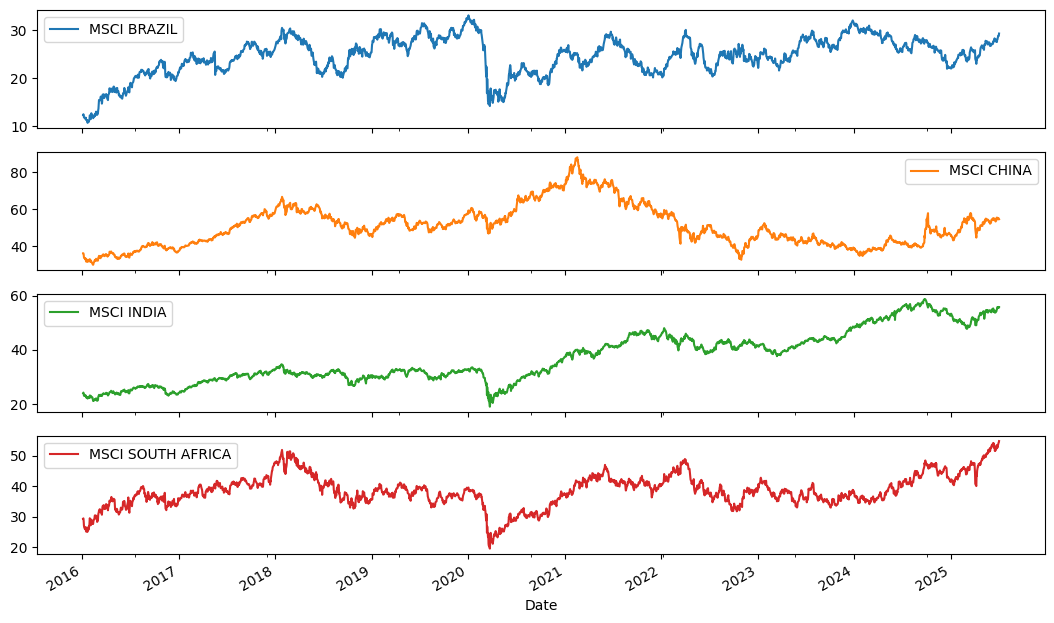

In [ ]:

cols = ['MSCI BRAZIL', 'MSCI CHINA', 'MSCI INDIA', 'MSCI SOUTH AFRICA']
df_subset[cols] = df_subset[cols].apply(pd.to_numeric, errors='coerce')

df_subset[cols].plot(subplots=True, figsize=(13, 8))


Definindo o conjunto dos BRICS com os países em que a avaliação é possível no dataset -- decidimos excluir a Rússia devido a falta de dados depois de 2022

In [7]:
df_brics=df_subset[['MSCI BRAZIL', 'MSCI CHINA', 'MSCI INDIA', 'MSCI SOUTH AFRICA']].copy()
df_brics.head()

,MSCI BRAZIL,MSCI CHINA,MSCI INDIA,MSCI SOUTH AFRICA
Date,,,,
2016-01-04,12.360641,36.292149,23.988008,29.382587
2016-01-05,12.534207,36.258453,24.219690,29.485670
2016-01-06,12.348243,35.651760,23.863255,28.590216
2016-01-07,11.889524,34.194000,23.105833,27.147165
2016-01-08,11.833734,33.688419,23.007812,26.586708


/tmp/ipython-input-8-3018021166.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_brics.resample('M').mean().dropna()


Text(0.5, 1.0, 'Média Mensal dos ETFs do BRICS (2016-2025)')

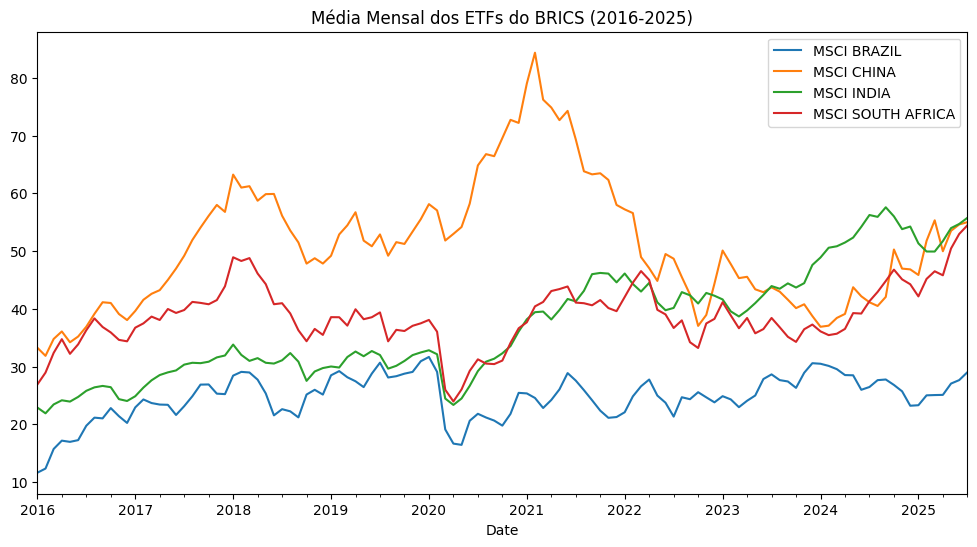

In [8]:
#agora vamos tomar somente brasil, china, india e south africa
df_brics=df_subset[['MSCI BRAZIL', 'MSCI CHINA', 'MSCI INDIA', 'MSCI SOUTH AFRICA']].copy()

df_monthly = df_brics.resample('M').mean().dropna()
df_monthly = df_monthly['2016-01':'2025-07']

df_monthly.head()

df_monthly.plot(figsize=(12, 6))
plt.title('Média Mensal dos ETFs do BRICS (2016-2025)')


In [ ]:
print(df_monthly.index.names)


In [8]:
df_monthly.head()

,MSCI BRAZIL,MSCI CHINA,MSCI INDIA,MSCI SOUTH AFRICA
Date,,,,
2016-01-31,11.607309,33.254244,22.892911,26.879313
2016-02-29,12.328716,31.848953,21.893066,28.943879
2016-03-31,15.721862,34.773118,23.432699,32.360029
2016-04-30,17.161259,36.069855,24.149251,34.733859
2016-05-31,16.952858,34.196004,23.925631,32.197191


In [9]:
%pip install pycatch22

# **Extração de Features com Catch22**

Nesta seção, vamos extrair features temporais dos ETFs dos BRICS utilizando o pacote `pycatch22`. Cada país terá suas séries processadas em janelas móveis, gerando um conjunto de características para uso nos modelos de classificação de regimes de mercado.
Como o catch22 essencialmente transforma dados de séries históricas para dados tabulares no formato X/y, ele é imprescindível para uma tarefa de classificação como esta a seguir -- apesar de não ser tão bom para tarefas como forecasting.

*para saber mais sobre o catch22: https://github.com/DynamicsAndNeuralSystems/catch22*

In [10]:


from pycatch22 import catch22_all

dataframes_features = {}
window_size = 30

for country in df_brics.columns:
    print(f"\n📊 Processando {country}...")
    series = df_brics[country].dropna()
    rows = []


    for i in range(window_size, len(series)):
        window_data = series.iloc[i-window_size:i].values
        date = series.index[i]
        value = series.iloc[i]

        try:
            features = catch22_all(window_data)
            df_feat = pd.DataFrame([features['values']], columns=features['names'])
            df_feat['date'] = date
            df_feat['target'] = value
            rows.append(df_feat)

        except Exception as e:
            print(f"❌ Erro em {date}: {e}")

    if rows:
        df_country = pd.concat(rows)
        dataframes_features[country] = df_country
        print(f"✅ {len(df_country)} janelas processadas para {country}")
    else:
        print(f"⚠️ Nenhuma janela completa para {country}")


📊 Processando MSCI BRAZIL...
✅ 2359 janelas processadas para MSCI BRAZIL

📊 Processando MSCI CHINA...
✅ 2359 janelas processadas para MSCI CHINA

📊 Processando MSCI INDIA...
✅ 2359 janelas processadas para MSCI INDIA

📊 Processando MSCI SOUTH AFRICA...
✅ 2359 janelas processadas para MSCI SOUTH AFRICA


Análise exploratória dos dataframes dos países:

In [11]:

df_brasil = dataframes_features["MSCI BRAZIL"]
df_china=dataframes_features["MSCI CHINA"]
df_india=dataframes_features["MSCI INDIA"]
df_south_africa=dataframes_features["MSCI SOUTH AFRICA"]


In [12]:
for df in [df_brasil, df_china, df_india, df_south_africa]:

  df=df.drop(columns=["date"], inplace=True)





In [13]:
for df in [df_brasil, df_china, df_india, df_south_africa]:
  #vamos fazer um drop das datas
  df=df.drop(columns=["SC_FluctAnal_2_rsrangefit_50_1_logi_prop_r1","SC_FluctAnal_2_dfa_50_1_2_logi_prop_r1" ], inplace=True)


In [14]:
for df in [df_brasil, df_china, df_india, df_south_africa]:
  print(df.columns)


Index(['DN_HistogramMode_5', 'DN_HistogramMode_10', 'CO_f1ecac',
       'CO_FirstMin_ac', 'CO_HistogramAMI_even_2_5', 'CO_trev_1_num',
       'MD_hrv_classic_pnn40', 'SB_BinaryStats_mean_longstretch1',
       'SB_TransitionMatrix_3ac_sumdiagcov', 'PD_PeriodicityWang_th0_01',
       'CO_Embed2_Dist_tau_d_expfit_meandiff',
       'IN_AutoMutualInfoStats_40_gaussian_fmmi',
       'FC_LocalSimple_mean1_tauresrat', 'DN_OutlierInclude_p_001_mdrmd',
       'DN_OutlierInclude_n_001_mdrmd', 'SP_Summaries_welch_rect_area_5_1',
       'SB_BinaryStats_diff_longstretch0', 'SB_MotifThree_quantile_hh',
       'SP_Summaries_welch_rect_centroid', 'FC_LocalSimple_mean3_stderr',
       'target'],
      dtype='object')
Index(['DN_HistogramMode_5', 'DN_HistogramMode_10', 'CO_f1ecac',
       'CO_FirstMin_ac', 'CO_HistogramAMI_even_2_5', 'CO_trev_1_num',
       'MD_hrv_classic_pnn40', 'SB_BinaryStats_mean_longstretch1',
       'SB_TransitionMatrix_3ac_sumdiagcov', 'PD_PeriodicityWang_th0_01',
       'CO_Embe

In [15]:
df_brasil.head()

,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,...,IN_AutoMutualInfoStats_40_gaussian_fmmi,FC_LocalSimple_mean1_tauresrat,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr,target
0,0.657881,0.849416,3.715773,12,0.403565,0.062985,1.0,7.0,0.062500,0,...,5.0,0.166667,0.400000,-0.066667,0.718381,5.0,1.858639,0.19635,0.777016,12.528011
0,0.638488,0.827452,3.902620,10,0.416668,0.080948,1.0,7.0,0.062500,0,...,5.0,0.166667,0.466667,-0.133333,0.696556,5.0,1.886012,0.19635,0.776429,12.205669
0,0.675111,0.868630,4.050164,10,0.437499,0.080140,1.0,7.0,0.041667,0,...,5.0,0.142857,0.466667,-0.200000,0.699924,5.0,1.886012,0.19635,0.777203,12.280053
0,0.682686,0.877106,4.142379,12,0.473370,0.105977,1.0,7.0,0.041667,0,...,6.0,0.142857,0.433333,-0.266667,0.699342,5.0,1.870356,0.19635,0.771178,13.079714
0,0.145254,0.765973,4.028754,6,0.457730,0.177516,1.0,7.0,0.111111,2,...,5.0,0.125000,0.500000,-0.333333,0.664920,5.0,1.870356,0.19635,0.740295,12.738774


# Função de agregação dos dados em janelas de 10 dias

O objetivo aqui é dividir o dataframe de cada país( com retornos diários) em janelas de 10 dias para tentar prever 10 dias a frente qual
regime de mercado será. 

A agregação será a partir da média das features do dataframe; porém, observe que isso vai dividir o tamanho do dataframe por fator de 10.



In [ ]:


def aggregate_and_classify(df, window=10):
    """
    Agrega features em janelas de 10 dias e classifica o regime

    Args:
        df: DataFrame original (sem coluna de data)
        window: tamanho da janela (padrão=10)

    Returns:
        DataFrame agregado com médias e regime
    """
    # Cria grupos de 10 linhas
    df['window_group'] = np.arange(len(df)) // window

    # Agrega todas as features pela média
    df_agg = df.groupby('window_group').mean()

    # Calcula o retorno
    df_agg['return'] = df_agg['target'].pct_change()

    # regimes
    conditions = [
        (df_agg['return'] > 0.02),               # Bull (1)
        (df_agg['return'] < -0.02),              # Bear (0)
        (df_agg['return'].between(-0.02, 0.02))  # Neutro (2)
    ]
    choices = [1, 0, 2]
    df_agg['regime'] = np.select(conditions, choices, default=np.nan)

    return df_agg.reset_index(drop=True)


countries = {
    'brasil': df_brasil,
    'india': df_india,
    'china': df_china,
    'south_africa': df_south_africa
}

# Processa cada país
for country, df in countries.items():
    if df is not None:
        print(f"Processando {country}...")
        try:

            df_regime = aggregate_and_classify(df)


            globals()[f"df_{country}_regime"] = df_regime


            original_size = df.shape[0]
            new_size = df_regime.shape[0]
            print(f"✅ {country}: De {original_size} para {new_size} registros")
            print(f"Distribuição de regimes: {dict(df_regime['regime'].value_counts())}\n")
        except Exception as e:
            print(f"❌ Erro em {country}: {str(e)}")
    else:
        print(f"⚠️ DataFrame para {country} não encontrado")


if 'df_brasil_regime' in globals():
    print("Exemplo do DataFrame do Brasil:")
    print(df_brasil_regime.head())

Processando brasil...
✅ brasil: De 2359 para 236 registros
Distribuição de regimes: {1.0: np.int64(84), 0.0: np.int64(76), 2.0: np.int64(75)}

Processando india...
✅ india: De 2359 para 236 registros
Distribuição de regimes: {2.0: np.int64(122), 1.0: np.int64(71), 0.0: np.int64(42)}

Processando china...
✅ china: De 2359 para 236 registros
Distribuição de regimes: {2.0: np.int64(96), 1.0: np.int64(74), 0.0: np.int64(65)}

Processando south_africa...
✅ south_africa: De 2359 para 236 registros
Distribuição de regimes: {1.0: np.int64(88), 2.0: np.int64(83), 0.0: np.int64(64)}

Exemplo do DataFrame do Brasil:
   DN_HistogramMode_5  DN_HistogramMode_10  CO_f1ecac  CO_FirstMin_ac  \
0            0.616729             0.700077   4.149703             9.7   
1           -0.307520            -0.269622   3.747599            10.6   
2           -0.815230            -0.581139   6.332491            17.6   
3            0.699308             0.773729   4.184749            14.2   
4           -0.038257 

Observe que a variável alvo *regime* é bem balanceada nos datasets por país. Isso é importante pois, no final, usaremos a acurácia como referência métrica.

In [17]:
df_brasil_regime['regime'].value_counts()

,count
regime,
1.0,84
0.0,76
2.0,75


In [18]:
df_china_regime['regime'].value_counts()

,count
regime,
2.0,96
1.0,74
0.0,65


In [19]:
df_south_africa_regime.head(50)

,DN_HistogramMode_5,DN_HistogramMode_10,CO_f1ecac,CO_FirstMin_ac,CO_HistogramAMI_even_2_5,CO_trev_1_num,MD_hrv_classic_pnn40,SB_BinaryStats_mean_longstretch1,SB_TransitionMatrix_3ac_sumdiagcov,PD_PeriodicityWang_th0_01,...,DN_OutlierInclude_p_001_mdrmd,DN_OutlierInclude_n_001_mdrmd,SP_Summaries_welch_rect_area_5_1,SB_BinaryStats_diff_longstretch0,SB_MotifThree_quantile_hh,SP_Summaries_welch_rect_centroid,FC_LocalSimple_mean3_stderr,target,return,regime
0,0.260167,-0.017854,4.303813,12.3,0.606169,0.023428,1.000000,8.7,0.104398,0.4,...,0.643333,-0.530000,0.776491,4.1,1.686186,0.196350,0.613070,29.673774,NaN,NaN
1,-0.230417,-0.026010,3.095004,6.8,0.456520,0.077147,0.986207,8.6,0.140278,0.0,...,0.740000,-0.610000,0.544639,4.0,1.843135,0.431969,0.637668,31.624453,0.065737,1.0
2,0.366322,0.413248,3.860701,7.3,0.592613,0.059369,0.958621,10.8,0.166667,0.0,...,0.730000,-0.603333,0.647874,4.0,1.710945,0.215984,0.579813,33.098416,0.046608,1.0
3,0.403571,0.785376,3.496244,8.0,0.508006,0.060618,0.937931,11.8,0.166667,4.2,...,0.606667,-0.710000,0.659837,4.0,1.734207,0.274889,0.622759,33.645996,0.016544,2.0
4,0.185462,0.349686,2.737270,5.8,0.487541,0.048184,0.962069,7.2,0.122815,7.1,...,0.770000,-0.623333,0.625591,4.0,1.744175,0.431969,0.691112,35.550293,0.056598,1.0
5,0.374026,0.301519,3.732859,13.9,0.654709,-0.083897,0.962069,14.5,0.114120,4.8,...,0.446667,-0.250000,0.687090,4.0,1.830332,0.196350,0.712470,33.474636,-0.058387,0.0
6,0.791852,0.815332,4.941410,13.1,0.619463,-0.077157,0.951724,15.7,0.114583,6.7,...,-0.206667,0.708333,0.782710,4.9,1.826229,0.196350,0.567468,31.513649,-0.058581,0.0
7,-0.408505,-0.267525,5.125750,15.2,0.594479,-0.060354,0.924138,9.5,0.109954,6.4,...,-0.576667,0.350000,0.805100,6.0,1.652956,0.196350,0.531803,33.901106,0.075759,1.0
8,-0.470491,-0.216037,3.779872,12.5,0.544415,-0.010750,0.958621,8.6,0.105556,5.1,...,0.563333,-0.293333,0.746504,5.9,1.713967,0.196350,0.669965,33.714240,-0.005512,2.0
9,-0.526289,0.578333,2.109146,5.6,0.444723,-0.470648,0.951724,7.4,0.050601,0.0,...,0.270000,-0.523333,0.439085,5.0,1.845132,0.510509,0.947862,33.726753,0.000371,2.0


In [20]:
df_south_africa_regime['regime'].value_counts()

,count
regime,
1.0,88
2.0,83
0.0,64


In [21]:

df_brasil_regime.shape


(236, 23)

# Pipeline para assembleia de modelos

Vale notar que ao tomar 20% dos dados para teste final na assembleia há um tradeoff: nós impedimos data leakage, tornando a assembleia menos enviesada, porém comprometemos o treinamento de cada modelo individual na assembleia. 

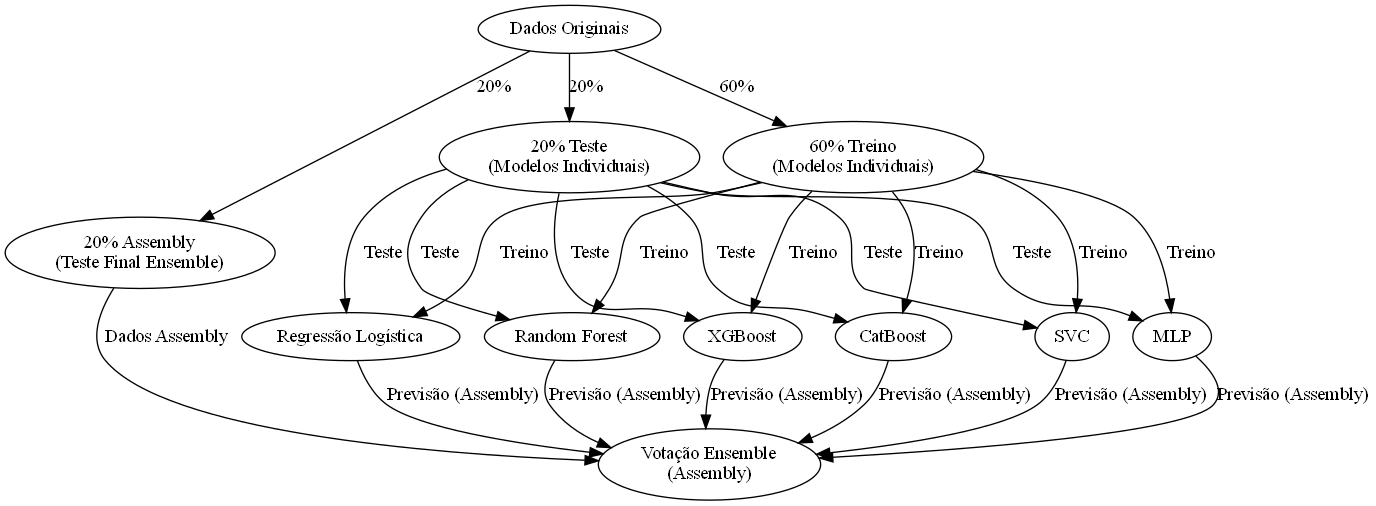

In [6]:
from IPython.display import Image, display

display(Image(filename='pipeline_ensemble.png'))

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import joblib

# Dicionários para armazenar os splits
preprocessed_data = {}  # Para treino/validação dos modelos individuais
assembly_data = {}      # Para o teste final do assembly

for country in ['brasil', 'india', 'china', 'south_africa']:
    df_name = f'df_{country}_regime'
    if df_name not in globals():
        continue

    print(f'\n=== Pré-processamento {country.upper()} ===')
    df = globals()[df_name]

    # Remove primeira linha (onde regime é NaN)
    df_clean = df.dropna(subset=['regime']).copy()


    if len(df) != len(df_clean):
        print(f"Removidas {len(df) - len(df_clean)} linhas com NaN")

    # Separa features e target
    X = df_clean.drop(columns=['regime', 'return'], errors='ignore')
    y = df_clean['regime']

    # Split 60% treino | 40% temporário (seed fixa)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.4, random_state=666, stratify=y)

    # Split dos 40% em 20% teste (modelos) e 20% assembly (seed diferente)
    X_test, X_test_assembly, y_test, y_test_assembly = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=667, stratify=y_temp)


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)


    preprocessed_data[country] = {
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'y_train': y_train,
        'y_test': y_test,
        'scaler': scaler,
        'original_shape': df.shape,
        'clean_shape': df_clean.shape
    }

    # Armazena dados para assembly (não normalizados ainda)
    assembly_data[country] = {
        'X_test_assembly': X_test_assembly,
        'y_test_assembly': y_test_assembly
    }

    print(f"✅ {country} pré-processado | Shapes:")
    print(f"Original: {df.shape} | Limpo: {df_clean.shape}")
    print(f"Train: {X_train.shape} | Test: {X_test.shape} | Assembly: {X_test_assembly.shape}")
    print(f"Proporções: Treino {len(y_train)/len(y):.0%} | Teste Modelos {len(y_test)/len(y):.0%} | Teste Assembly {len(y_test_assembly)/len(y):.0%}")


print("\nExemplo de acesso para Brasil:")
print("Dados modelos:", preprocessed_data['brasil']['X_train'].shape)
print("Dados assembly:", assembly_data['brasil']['X_test_assembly'].shape)


=== Pré-processamento BRASIL ===
Removidas 1 linhas com NaN
✅ brasil pré-processado | Shapes:
Original: (236, 23) | Limpo: (235, 23)
Train: (141, 21) | Test: (47, 21) | Assembly: (47, 21)
Proporções: Treino 60% | Teste Modelos 20% | Teste Assembly 20%

=== Pré-processamento INDIA ===
Removidas 1 linhas com NaN
✅ india pré-processado | Shapes:
Original: (236, 23) | Limpo: (235, 23)
Train: (141, 21) | Test: (47, 21) | Assembly: (47, 21)
Proporções: Treino 60% | Teste Modelos 20% | Teste Assembly 20%

=== Pré-processamento CHINA ===
Removidas 1 linhas com NaN
✅ china pré-processado | Shapes:
Original: (236, 23) | Limpo: (235, 23)
Train: (141, 21) | Test: (47, 21) | Assembly: (47, 21)
Proporções: Treino 60% | Teste Modelos 20% | Teste Assembly 20%

=== Pré-processamento SOUTH_AFRICA ===
Removidas 1 linhas com NaN
✅ south_africa pré-processado | Shapes:
Original: (236, 23) | Limpo: (235, 23)
Train: (141, 21) | Test: (47, 21) | Assembly: (47, 21)
Proporções: Treino 60% | Teste Modelos 20% |

# Treino dos modelos individuais 

ps: todos os modelos sofreram validação cruzada e tunagem por hiperparâmetros

Multi-layer Perceptron

*ref.: https://scikit-learn.org/stable/modules/neural_networks_supervised.html*

In [ ]:

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import loguniform
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.neural_network import MLPClassifier
from scipy.stats import loguniform

mlp_models = {}
for country, data in preprocessed_data.items():
    print(f'\n=== MLP para {country.upper()} ===')

    param_grid = {
        'hidden_layer_sizes': [(10,), (15,), (10,5), (10,10)],
        'activation': ['tanh'],  # Mais estável para pequenos datasets
        'alpha': loguniform(1e-4, 1),
        'batch_size': [4, 8, 16],
        'learning_rate_init': loguniform(1e-4, 1e-2),
        'early_stopping': [True],
        'validation_fraction': [0.2],
        'n_iter_no_change': [20],
        'tol': [1e-4]
    }

    mlp = MLPClassifier(max_iter=500, random_state=666)
    search = RandomizedSearchCV(mlp, param_grid, n_iter=25, cv=5,
                              scoring='neg_log_loss', n_jobs=-1)

    search.fit(data['X_train'], data['y_train'])
    best_mlp = search.best_estimator_
    mlp_models[country] = best_mlp

    # Avaliação
    train_score = best_mlp.score(data['X_train'], data['y_train'])
    test_score = best_mlp.score(data['X_test'], data['y_test'])
    print(f"Melhores params: {search.best_params_}")
    print(f"Acurácia (Train/Test): {train_score:.3f}/{test_score:.3f}")
    print(f"Gap: {train_score-test_score:.3f} (ideal <0.15)")



    joblib.dump(best_mlp, f'mlp_{country}.pkl')


=== MLP para BRASIL ===
Melhores params: {'activation': 'tanh', 'alpha': np.float64(0.32970410007135725), 'batch_size': 4, 'early_stopping': True, 'hidden_layer_sizes': (10, 10), 'learning_rate_init': np.float64(0.0027350502358924277), 'n_iter_no_change': 20, 'tol': 0.0001, 'validation_fraction': 0.2}
Acurácia (Train/Test): 0.695/0.660
Gap: 0.035 (ideal <0.15)

=== MLP para INDIA ===
Melhores params: {'activation': 'tanh', 'alpha': np.float64(0.0002562768246375741), 'batch_size': 8, 'early_stopping': True, 'hidden_layer_sizes': (10, 10), 'learning_rate_init': np.float64(0.003907488943741749), 'n_iter_no_change': 20, 'tol': 0.0001, 'validation_fraction': 0.2}
Acurácia (Train/Test): 0.553/0.447
Gap: 0.106 (ideal <0.15)

=== MLP para CHINA ===
Melhores params: {'activation': 'tanh', 'alpha': np.float64(0.712365059109943), 'batch_size': 16, 'early_stopping': True, 'hidden_layer_sizes': (10,), 'learning_rate_init': np.float64(0.002213121354701975), 'n_iter_no_change': 20, 'tol': 0.0001, 'v

XGboost

*ref.:https://xgboost.readthedocs.io/en/stable/*

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import log_loss


xgb_models = {}

for country, data in preprocessed_data.items():
    print(f'\n=== XGBoost para {country.upper()} ===')
    param_grid = {
    'n_estimators': [80, 120],
    'max_depth': [2, 3, 5],
    'learning_rate': loguniform(0.03, 0.15),
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.6, 0.8],
    'gamma': [0.05, 0.1, 0.3],
    'reg_alpha': loguniform(0.05, 1.0),
    'reg_lambda': loguniform(0.1, 3),
    'min_child_weight': [3, 5, 7]
}

    xgb = XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=666,
        n_jobs=-1
    )

    search = RandomizedSearchCV(
        xgb,
        param_grid,
        n_iter=100,
        cv=7,
        scoring='neg_log_loss',
        n_jobs=-1,
        verbose=0
    )

    search.fit(
        data['X_train'],
        data['y_train'],
        eval_set=[(data['X_test'], data['y_test'])],
        verbose=False
    )

    best_xgb = search.best_estimator_
    xgb_models[country] = best_xgb

    train_proba = best_xgb.predict_proba(data['X_train'])
    test_proba = best_xgb.predict_proba(data['X_test'])
    train_score = log_loss(data['y_train'], train_proba)
    test_score = log_loss(data['y_test'], test_proba)

    print(f"Melhores params: {search.best_params_}")
    print(f"Log Loss (Train/Test): {train_score:.3f}/{test_score:.3f}")
    print(f"Gap: {train_score - test_score:.3f} (ideal próximo a 0)")

    joblib.dump(best_xgb, f'xgb_{country}.pkl')



=== XGBoost para BRASIL ===


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:44:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Melhores params: {'colsample_bytree': 0.6, 'gamma': 0.05, 'learning_rate': np.float64(0.040577465280837034), 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 80, 'reg_alpha': np.float64(0.2582748609111214), 'reg_lambda': np.float64(1.2719501195825271), 'subsample': 0.9}
Log Loss (Train/Test): 0.427/0.790
Gap: -0.363 (ideal próximo a 0)

=== XGBoost para INDIA ===


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:45:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Melhores params: {'colsample_bytree': 0.8, 'gamma': 0.3, 'learning_rate': np.float64(0.04326927297850679), 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 80, 'reg_alpha': np.float64(0.2730168428911431), 'reg_lambda': np.float64(0.33481388173753013), 'subsample': 0.9}
Log Loss (Train/Test): 0.253/0.768
Gap: -0.514 (ideal próximo a 0)

=== XGBoost para CHINA ===


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:46:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Melhores params: {'colsample_bytree': 0.6, 'gamma': 0.3, 'learning_rate': np.float64(0.09213794428420587), 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 80, 'reg_alpha': np.float64(0.09141212519059326), 'reg_lambda': np.float64(0.19080646257201422), 'subsample': 0.9}
Log Loss (Train/Test): 0.348/0.912
Gap: -0.563 (ideal próximo a 0)

=== XGBoost para SOUTH_AFRICA ===
Melhores params: {'colsample_bytree': 0.6, 'gamma': 0.3, 'learning_rate': np.float64(0.05234481717648806), 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 80, 'reg_alpha': np.float64(0.1516217723604682), 'reg_lambda': np.float64(1.5774479447781573), 'subsample': 0.7}
Log Loss (Train/Test): 0.362/0.883
Gap: -0.520 (ideal próximo a 0)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:47:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest

*ref.:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html*

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_models = {}

for country, data in preprocessed_data.items():
    print(f'\n=== Random Forest para {country.upper()} ===')

    param_grid = {
        'n_estimators': [50, 100],
        'max_depth': [None, 3, 5],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [3, 5],
        'max_features': ['sqrt', 0.5],
        'bootstrap': [True],  # necessário para oob_score_
        'ccp_alpha': loguniform(1e-3, 0.1),
        'class_weight': ['balanced', None]
    }


    rf = RandomForestClassifier(
        random_state=666,
        n_jobs=-1,
        oob_score=True
    )

    search = RandomizedSearchCV(
        rf,
        param_grid,
        n_iter=15,
        cv=5,
        scoring='neg_log_loss',
        n_jobs=-1
    )

    search.fit(data['X_train'], data['y_train'])
    best_rf = search.best_estimator_
    rf_models[country] = best_rf

    # Avaliação
    oob_score = best_rf.oob_score_ if best_rf.bootstrap else None
    test_score = best_rf.score(data['X_test'], data['y_test'])

    print(f"Melhores params: {search.best_params_}")
    print(f"OOB Score: {oob_score:.3f}" if oob_score is not None else "Sem OOB")
    print(f"Acurácia Teste: {test_score:.3f}")

    joblib.dump(best_rf, f'rf_{country}.pkl')



=== Random Forest para BRASIL ===
Melhores params: {'bootstrap': True, 'ccp_alpha': np.float64(0.011426717359994147), 'class_weight': 'balanced', 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}
OOB Score: 0.574
Acurácia Teste: 0.660

=== Random Forest para INDIA ===
Melhores params: {'bootstrap': True, 'ccp_alpha': np.float64(0.002424686662942513), 'class_weight': None, 'max_depth': 5, 'max_features': 0.5, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 50}
OOB Score: 0.681
Acurácia Teste: 0.723

=== Random Forest para CHINA ===
Melhores params: {'bootstrap': True, 'ccp_alpha': np.float64(0.005104982980294119), 'class_weight': None, 'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}
OOB Score: 0.582
Acurácia Teste: 0.638

=== Random Forest para SOUTH_AFRICA ===
Melhores params: {'bootstrap': True, 'ccp_alpha': np.float64(0.004185440329074393), 'class_wei

SVC

*ref.:https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html*

In [26]:
from sklearn.svm import SVC

svc_models = {}
for country, data in preprocessed_data.items():
    print(f'\n=== SVC para {country.upper()} ===')

    param_grid = {
        'C': loguniform(0.1, 10),
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'],
        'class_weight': ['balanced', None],
        'tol': [1e-4, 1e-3],
        'shrinking': [True, False]
    }

    svc = SVC(probability=True, random_state=666)
    search = RandomizedSearchCV(svc, param_grid, n_iter=30, cv=7,
                              scoring='neg_log_loss', n_jobs=-1)

    search.fit(data['X_train'], data['y_train'])
    best_svc = search.best_estimator_
    svc_models[country] = best_svc


    train_score = best_svc.score(data['X_train'], data['y_train'])
    test_score = best_svc.score(data['X_test'], data['y_test'])

    print(f"Melhores params: {search.best_params_}")
    print(f"Acurácia (Train/Test): {train_score:.3f}/{test_score:.3f}")
    print(f"Gap: {train_score-test_score:.3f}")

    joblib.dump(best_svc, f'svc_{country}.pkl')


=== SVC para BRASIL ===
Melhores params: {'C': np.float64(0.1092153780316265), 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear', 'shrinking': False, 'tol': 0.0001}
Acurácia (Train/Test): 0.723/0.660
Gap: 0.064

=== SVC para INDIA ===
Melhores params: {'C': np.float64(2.0349893627049043), 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': False, 'tol': 0.0001}
Acurácia (Train/Test): 0.887/0.638
Gap: 0.248

=== SVC para CHINA ===
Melhores params: {'C': np.float64(4.2974090980562), 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True, 'tol': 0.0001}
Acurácia (Train/Test): 0.965/0.596
Gap: 0.369

=== SVC para SOUTH_AFRICA ===
Melhores params: {'C': np.float64(3.3949733138184714), 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf', 'shrinking': False, 'tol': 0.0001}
Acurácia (Train/Test): 0.957/0.468
Gap: 0.489


In [27]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.8 MB/s eta 0:00:00


Catboost

*ref.: https://catboost.ai/docs/en/concepts/python-reference_catboostclassifier*


=== CatBoost para BRASIL ===
Melhores parâmetros: {'bagging_temperature': 0, 'border_count': 32, 'depth': 4, 'early_stopping_rounds': 10, 'iterations': 80, 'l2_leaf_reg': np.float64(5.959268844041814), 'leaf_estimation_iterations': 10, 'learning_rate': np.float64(0.023932750078800306), 'random_strength': 0.5}
AUC-ROC: 0.814


<Figure size 800x600 with 0 Axes>

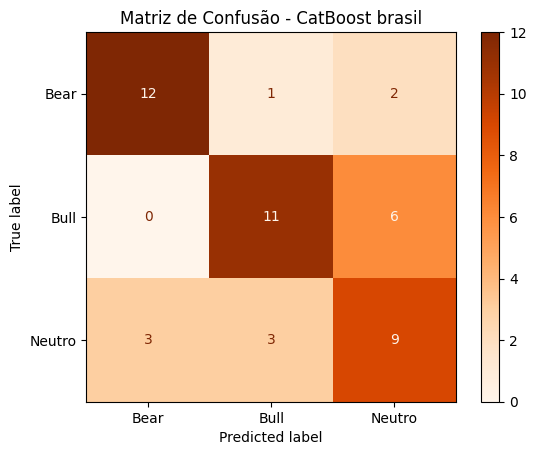


=== CatBoost para INDIA ===
Melhores parâmetros: {'bagging_temperature': 0, 'border_count': 32, 'depth': 3, 'early_stopping_rounds': 10, 'iterations': 50, 'l2_leaf_reg': np.float64(4.409016543757543), 'leaf_estimation_iterations': 10, 'learning_rate': np.float64(0.07860037584132433), 'random_strength': 1}
AUC-ROC: 0.802


<Figure size 800x600 with 0 Axes>

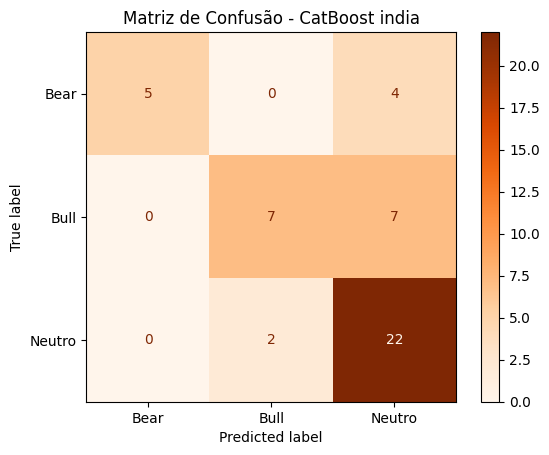


=== CatBoost para CHINA ===
Melhores parâmetros: {'bagging_temperature': 0, 'border_count': 32, 'depth': 4, 'early_stopping_rounds': 10, 'iterations': 80, 'l2_leaf_reg': np.float64(8.11296482140976), 'leaf_estimation_iterations': 10, 'learning_rate': np.float64(0.04810995017537023), 'random_strength': 0.5}
AUC-ROC: 0.791


<Figure size 800x600 with 0 Axes>

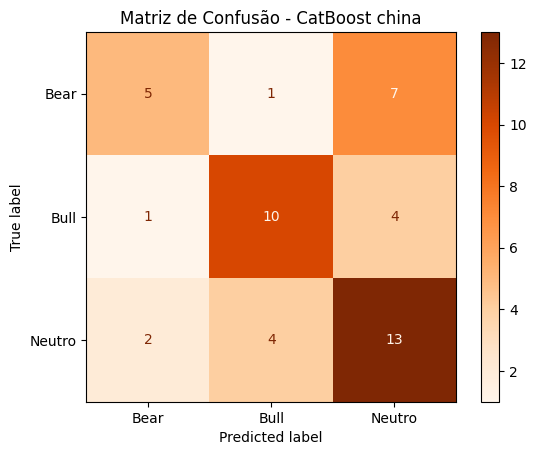


=== CatBoost para SOUTH_AFRICA ===
Melhores parâmetros: {'bagging_temperature': 0.5, 'border_count': 32, 'depth': 4, 'early_stopping_rounds': 10, 'iterations': 80, 'l2_leaf_reg': np.float64(3.5265124415253886), 'leaf_estimation_iterations': 10, 'learning_rate': np.float64(0.07369625879512913), 'random_strength': 1}
AUC-ROC: 0.753


<Figure size 800x600 with 0 Axes>

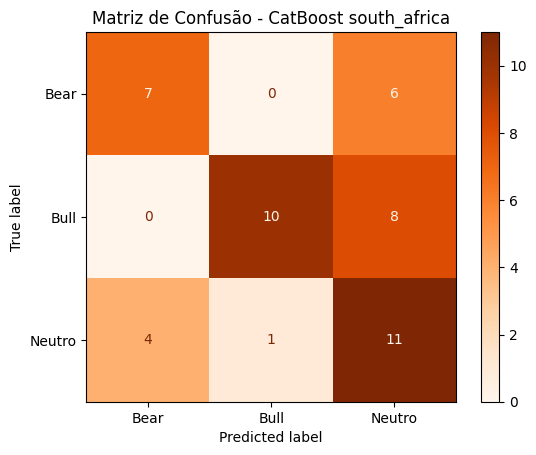

In [28]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay


catboost_models = {}
for country, data in preprocessed_data.items():
    print(f'\n=== CatBoost para {country.upper()} ===')

    # Configuração do Pool para melhor performance
    train_pool = Pool(data['X_train'], label=data['y_train'])
    test_pool = Pool(data['X_test'], label=data['y_test'])

    param_grid = {
        'depth': [3, 4],  # Árvores mais rasas
        'learning_rate': loguniform(0.01, 0.2),
        'iterations': [25, 50, 80],  # Menos árvores
        'l2_leaf_reg': loguniform(1, 10),
        'border_count': [32],
        'random_strength': [0.5, 1],  # Regularização adicional
        'bagging_temperature': [0, 0.5],  # Suavização
        'leaf_estimation_iterations': [5, 10],
        'early_stopping_rounds': [10]
    }

    cat = CatBoostClassifier(
        loss_function='MultiClass',
        verbose=0,  # Desativa logs
        random_seed=666,
        thread_count=-1
    )

    search = RandomizedSearchCV(
        cat, param_grid, n_iter=30, cv=5,
        scoring='neg_log_loss', n_jobs=-1, random_state=666
    )

    search.fit(data['X_train'], data['y_train'])
    best_cat = search.best_estimator_
    catboost_models[country] = best_cat


    y_pred = best_cat.predict(data['X_test'])
    y_proba = best_cat.predict_proba(data['X_test'])


    auc = roc_auc_score(data['y_test'], y_proba, multi_class='ovo')
    print(f"Melhores parâmetros: {search.best_params_}")
    print(f"AUC-ROC: {auc:.3f}")


    plt.figure(figsize=(8,6))
    cmd = ConfusionMatrixDisplay.from_predictions(
        data['y_test'], y_pred,
        display_labels=['Bear', 'Bull', 'Neutro'],
        cmap='Oranges'
    )
    plt.title(f'Matriz de Confusão - CatBoost {country}')
    plt.show()


    # Salvar modelo
    joblib.dump(best_cat, f'catboost_{country}.pkl')

Regressão Logística

*ref.: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html*


=== Logistic Regression para BRASIL ===
Melhores parâmetros: {'logreg__C': np.float64(0.17544366233758285), 'logreg__class_weight': 'balanced', 'logreg__l1_ratio': 0.7, 'logreg__penalty': 'elasticnet'}
AUC-ROC: 0.792


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

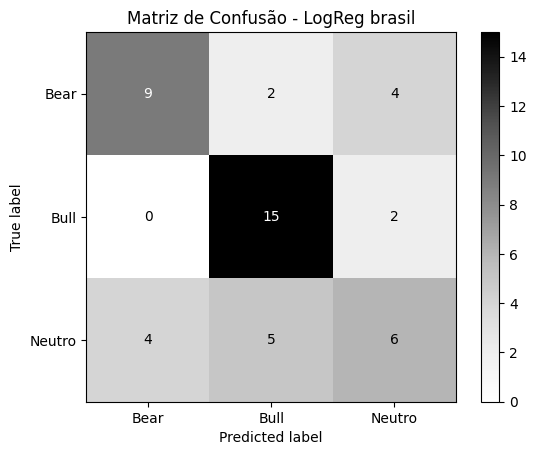


=== Logistic Regression para INDIA ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Melhores parâmetros: {'logreg__C': np.float64(0.19131406810094045), 'logreg__class_weight': None, 'logreg__l1_ratio': 0.7, 'logreg__penalty': 'elasticnet'}
AUC-ROC: 0.752


<Figure size 800x600 with 0 Axes>

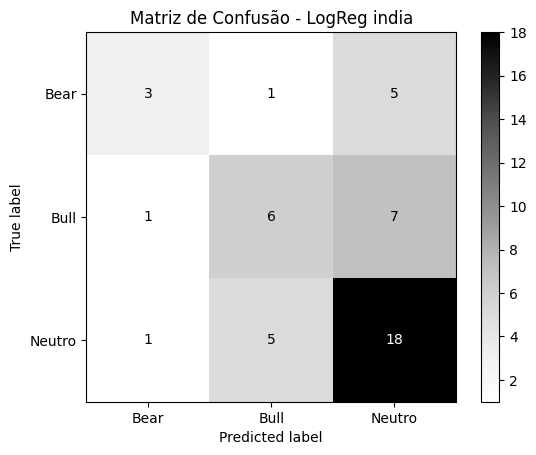


=== Logistic Regression para CHINA ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Melhores parâmetros: {'logreg__C': np.float64(0.19131406810094045), 'logreg__class_weight': None, 'logreg__l1_ratio': 0.7, 'logreg__penalty': 'elasticnet'}
AUC-ROC: 0.849


<Figure size 800x600 with 0 Axes>

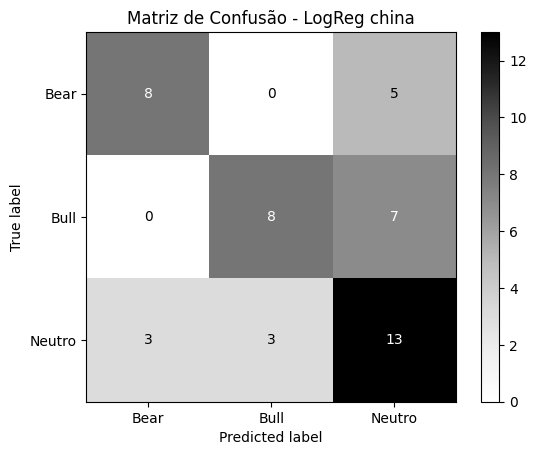


=== Logistic Regression para SOUTH_AFRICA ===
Melhores parâmetros: {'logreg__C': np.float64(0.22410813235686447), 'logreg__class_weight': None, 'logreg__l1_ratio': 0.5, 'logreg__penalty': 'elasticnet'}
AUC-ROC: 0.759


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

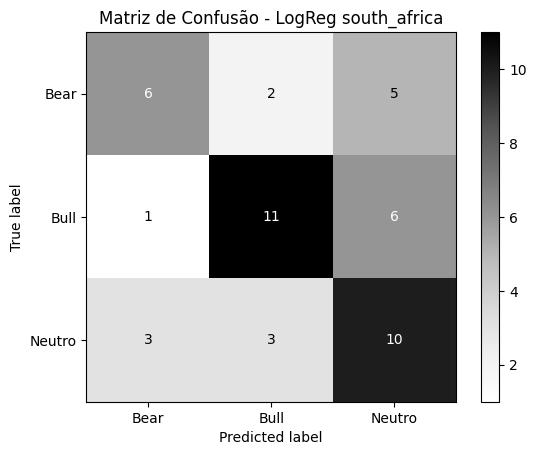

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logreg_models = {}
for country, data in preprocessed_data.items():
    print(f'\n=== Logistic Regression para {country.upper()} ===')

    # Pipeline com normalização
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(
            multi_class='multinomial',
            solver='saga',
            max_iter=1000,
            random_state=666
        ))
    ])

    param_grid = {
        'logreg__C': loguniform(1e-3, 10),
        'logreg__penalty': ['elasticnet'],
        'logreg__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],  # Mix L1/L2
        'logreg__class_weight': ['balanced', None]
    }

    search = RandomizedSearchCV(
        pipe, param_grid, n_iter=30, cv=7,
        scoring='neg_log_loss', n_jobs=-1, random_state=666
    )

    search.fit(data['X_train'], data['y_train'])
    best_logreg = search.best_estimator_
    logreg_models[country] = best_logreg


    y_pred = best_logreg.predict(data['X_test'])
    y_proba = best_logreg.predict_proba(data['X_test'])


    auc = roc_auc_score(data['y_test'], y_proba, multi_class='ovo')
    print(f"Melhores parâmetros: {search.best_params_}")
    print(f"AUC-ROC: {auc:.3f}")

    # 2. Matriz de Confusão
    plt.figure(figsize=(8,6))
    cmd = ConfusionMatrixDisplay.from_predictions(
        data['y_test'], y_pred,
        display_labels=['Bear', 'Bull', 'Neutro'],
        cmap='Greys'
    )
    plt.title(f'Matriz de Confusão - LogReg {country}')
    plt.show()



    # Salvar modelo
    joblib.dump(best_logreg, f'logreg_{country}.pkl')

# Assembleia final dos votos dos modelos com peso para os modelos que perfomaram melhor


=== ASSEMBLY DE MODELOS - BRASIL ===
MLP        | 1 voto  | Primeiras previsões: [0. 0. 1. 0. 0.]
XGB        | 1 voto  | Primeiras previsões: [2 2 0 2 0]
RF         | 1 voto  | Primeiras previsões: [0. 0. 0. 2. 0.]
SVC        | 2 votos | Primeiras previsões: [0. 2. 1. 0. 0.]
CATBOOST   | 1 voto  | Primeiras previsões: [2. 0. 0. 0. 0.]
LOGREG     | 2 votos | Primeiras previsões: [0. 0. 1. 0. 0.]

🔍 Classification Report (Ensemble):
              precision    recall  f1-score   support

        Bear       0.41      0.60      0.49        15
        Bull       0.77      0.59      0.67        17
      Neutro       0.50      0.40      0.44        15

    accuracy                           0.53        47
   macro avg       0.56      0.53      0.53        47
weighted avg       0.57      0.53      0.54        47



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


<Figure size 800x600 with 0 Axes>

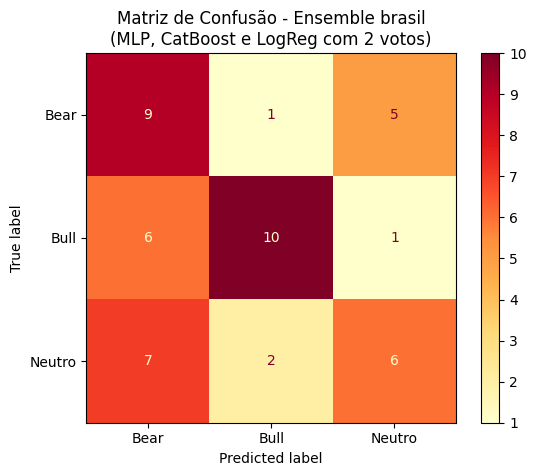


=== ASSEMBLY DE MODELOS - INDIA ===
MLP        | 1 voto  | Primeiras previsões: [2. 2. 2. 2. 2.]
XGB        | 1 voto  | Primeiras previsões: [2 2 2 2 0]
RF         | 1 voto  | Primeiras previsões: [2. 2. 2. 2. 2.]
SVC        | 2 votos | Primeiras previsões: [2. 2. 1. 1. 1.]
CATBOOST   | 1 voto  | Primeiras previsões: [2. 2. 2. 2. 2.]
LOGREG     | 2 votos | Primeiras previsões: [2. 2. 1. 2. 2.]

🔍 Classification Report (Ensemble):
              precision    recall  f1-score   support

        Bear       0.33      0.25      0.29         8
        Bull       0.88      0.50      0.64        14
      Neutro       0.61      0.80      0.69        25

    accuracy                           0.62        47
   macro avg       0.60      0.52      0.54        47
weighted avg       0.64      0.62      0.61        47



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


<Figure size 800x600 with 0 Axes>

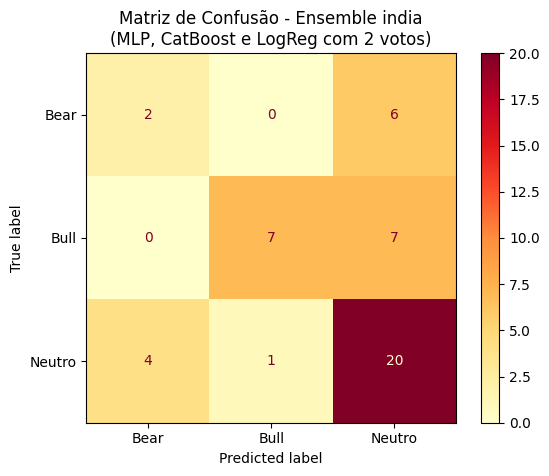


=== ASSEMBLY DE MODELOS - CHINA ===
MLP        | 1 voto  | Primeiras previsões: [0. 0. 1. 0. 0.]
XGB        | 1 voto  | Primeiras previsões: [0 0 2 2 2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RF         | 1 voto  | Primeiras previsões: [0. 2. 2. 2. 2.]
SVC        | 2 votos | Primeiras previsões: [2. 2. 2. 0. 0.]
CATBOOST   | 1 voto  | Primeiras previsões: [0. 0. 2. 2. 0.]
LOGREG     | 2 votos | Primeiras previsões: [0. 0. 1. 0. 2.]

🔍 Classification Report (Ensemble):
              precision    recall  f1-score   support

        Bear       0.53      0.62      0.57        13
        Bull       0.82      0.60      0.69        15
      Neutro       0.57      0.63      0.60        19

    accuracy                           0.62        47
   macro avg       0.64      0.62      0.62        47
weighted avg       0.64      0.62      0.62        47



<Figure size 800x600 with 0 Axes>

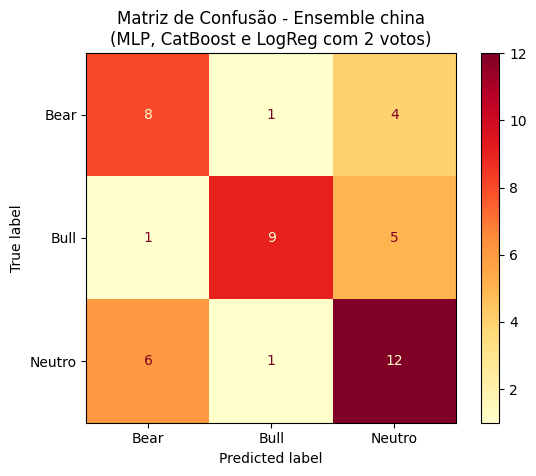


=== ASSEMBLY DE MODELOS - SOUTH_AFRICA ===
MLP        | 1 voto  | Primeiras previsões: [0. 0. 2. 0. 2.]
XGB        | 1 voto  | Primeiras previsões: [0 0 0 0 0]
RF         | 1 voto  | Primeiras previsões: [2. 2. 0. 2. 2.]
SVC        | 2 votos | Primeiras previsões: [0. 2. 1. 2. 2.]
CATBOOST   | 1 voto  | Primeiras previsões: [0. 0. 0. 0. 0.]
LOGREG     | 2 votos | Primeiras previsões: [2. 2. 1. 2. 2.]

🔍 Classification Report (Ensemble):
              precision    recall  f1-score   support

        Bear       0.47      0.62      0.53        13
        Bull       0.64      0.53      0.58        17
      Neutro       0.44      0.41      0.42        17

    accuracy                           0.51        47
   macro avg       0.52      0.52      0.51        47
weighted avg       0.52      0.51      0.51        47



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


<Figure size 800x600 with 0 Axes>

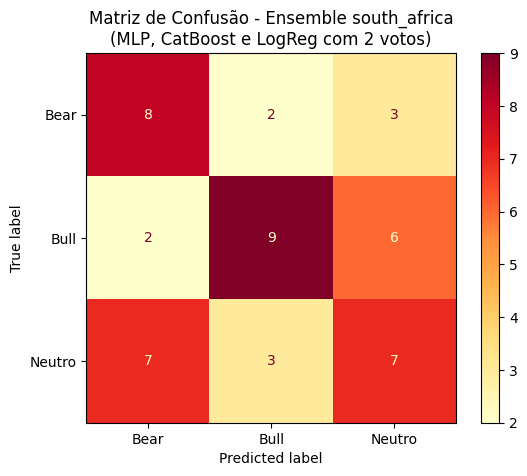


=== RESUMO FINAL ===
BRASIL          | Acurácia: 0.532 | Modelos: 6 | Ponderados: ['svc', 'logreg'] | Total votos: 8
INDIA           | Acurácia: 0.617 | Modelos: 6 | Ponderados: ['svc', 'logreg'] | Total votos: 8
CHINA           | Acurácia: 0.617 | Modelos: 6 | Ponderados: ['svc', 'logreg'] | Total votos: 8
SOUTH_AFRICA    | Acurácia: 0.511 | Modelos: 6 | Ponderados: ['svc', 'logreg'] | Total votos: 8


In [42]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Dicionário para armazenar resultados finais
ensemble_results = {}

for country in ['brasil', 'india', 'china', 'south_africa']:
    print(f'\n=== ASSEMBLY DE MODELOS - {country.upper()} ===')

    # Carregar dados de assembly
    X_assembly = assembly_data[country]['X_test_assembly']
    y_assembly = assembly_data[country]['y_test_assembly']

    # Carregar todos os modelos treinados
    models = {
        'mlp': joblib.load(f'mlp_{country}.pkl'),
        'xgb': joblib.load(f'xgb_{country}.pkl'),
        'rf': joblib.load(f'rf_{country}.pkl'),
        'svc': joblib.load(f'svc_{country}.pkl'),
        'catboost': joblib.load(f'catboost_{country}.pkl'),
        'logreg': joblib.load(f'logreg_{country}.pkl') }

    # Coletar previsões com pesos
    all_predictions = []
    weighted_models = []

    for name, model in models.items():
        try:
            #
            if name in ['mlp', 'svc', 'logreg']:
                scaler = preprocessed_data[country]['scaler']
                X_scaled = scaler.transform(X_assembly)
                pred = model.predict(X_scaled)
            else:
                pred = model.predict(X_assembly)

            # Garantir array 1D
            pred = np.array(pred).flatten()

            # pesos para modelos que performaram melhor
            if name in ['svc', 'logreg']:
                all_predictions.extend([pred, pred])  # 2 votos
                weighted_models.append(name)
                print(f"{name.upper():<10} | 2 votos | Primeiras previsões: {pred[:5]}")
            else:
                all_predictions.append(pred)  # 1 voto
                print(f"{name.upper():<10} | 1 voto  | Primeiras previsões: {pred[:5]}")

        except Exception as e:
            print(f"Erro em {name}: {str(e)}")
            continue

    # Votação majoritária ponderada
    ensemble_pred = np.array([
        np.bincount([pred[i] for pred in all_predictions]).argmax()
        for i in range(len(X_assembly))
    ])

    # Métricas
    print("\n🔍 Classification Report (Ensemble):")
    print(classification_report(y_assembly, ensemble_pred, target_names=['Bear', 'Bull', 'Neutro']))

    # Matriz de Confusão
    plt.figure(figsize=(8,6))
    cmd = ConfusionMatrixDisplay.from_predictions(
        y_assembly, ensemble_pred,
        display_labels=['Bear', 'Bull', 'Neutro'],
        cmap='YlOrRd'
    )
    plt.title(f'Matriz de Confusão - Ensemble {country}\n(MLP, CatBoost e LogReg com 2 votos)')
    plt.show()


    ensemble_results[country] = {
        'true': y_assembly,
        'pred': ensemble_pred,
        'models': list(models.keys()),
        'weighted_models': weighted_models,
        'total_votes': len(all_predictions)
    }

# Resumo final
print("\n=== RESUMO FINAL ===")
for country, res in ensemble_results.items():
    acc = accuracy_score(res['true'], res['pred'])
    print(f"{country.upper():<15} | Acurácia: {acc:.3f} | Modelos: {len(res['models'])} | Ponderados: {res['weighted_models']} | Total votos: {res['total_votes']}")